**Problem statement**
##### Austo Motor Company is a leading car manufacturer specializing in SUV, Sedan, and Hatchback models. In its recent board meeting, concerns were raised by the members on the efficiency of the marketing campaign currently being used. The board decides to rope in an analytics professional to improve the existing campaign.

**Data Description**
##### **Age**: The age of the individual in years.
##### **Gender**: The gender of the individual, categorized as male or female.
##### **Profession**: The occupation or profession of the individual.
##### **Marital_status**: The marital status of the individual, such as married &, single
##### **Education**: The educational qualification of the individual Graduate and Post Graduate
##### **No_of_Dependents**: The number of dependents (e.g., children, elderly parents) that the individual supports financially.
##### **Personal_loan**: A binary variable indicating whether the individual has taken a personal loan "Yes" or "No"
##### **House_loan**: A binary variable indicating whether the individual has taken a housing loan "Yes" or "No"
##### **Partner_working**: A binary variable indicating whether the individual's partner is employed "Yes" or "No"
##### **Salary**: The individual's salary or income.
##### **Partner_salary**: The salary or income of the individual's partner, if applicable.
##### **Total_salary**: The total combined salary of the individual and their partner (if applicable).
##### **Price**: The price of a product or service.
##### **Make**: The type of automobile




**Understanding the data**

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Reading the file
df = pd.read_csv('/content/austo_automobile .csv')

In [ ]:
df.shape            #This gives us number of rows and columns present in the data.

(1581, 14)

In [ ]:
df.head()           #This gives us first 5 records from the data

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
0,53,Male,Business,Married,Post Graduate,4,No,No,Yes,99300,70700.0,170000,61000,SUV
1,53,Femal,Salaried,Married,Post Graduate,4,Yes,No,Yes,95500,70300.0,165800,61000,SUV
2,53,Female,Salaried,Married,Post Graduate,3,No,No,Yes,97300,60700.0,158000,57000,SUV
3,53,Female,Salaried,Married,Graduate,2,Yes,No,Yes,72500,70300.0,142800,61000,SUV
4,53,Male,Salaried,Married,Post Graduate,3,No,No,Yes,79700,60200.0,139900,57000,SUV


In [ ]:
df.info()          #This returns information about the DataFrame including the index data type and columns, non-null values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1581 non-null   int64  
 1   Gender            1528 non-null   object 
 2   Profession        1581 non-null   object 
 3   Marital_status    1581 non-null   object 
 4   Education         1581 non-null   object 
 5   No_of_Dependents  1581 non-null   int64  
 6   Personal_loan     1581 non-null   object 
 7   House_loan        1581 non-null   object 
 8   Partner_working   1581 non-null   object 
 9   Salary            1581 non-null   int64  
 10  Partner_salary    1475 non-null   float64
 11  Total_salary      1581 non-null   int64  
 12  Price             1581 non-null   int64  
 13  Make              1581 non-null   object 
dtypes: float64(1), int64(5), object(8)
memory usage: 173.1+ KB


In [ ]:
df.describe().T          #This gives us summary statistics of numercial variables in the data.

,count,mean,std,min,25%,50%,75%,max
Age,1581.0,31.922201,8.425978,22.0,25.0,29.0,38.0,54.0
No_of_Dependents,1581.0,2.457938,0.943483,0.0,2.0,2.0,3.0,4.0
Salary,1581.0,60392.220114,14674.825044,30000.0,51900.0,59500.0,71800.0,99300.0
Partner_salary,1475.0,20225.559322,19573.149277,0.0,0.0,25600.0,38300.0,80500.0
Total_salary,1581.0,79625.996205,25545.857768,30000.0,60500.0,78000.0,95900.0,171000.0
Price,1581.0,35597.722960,13633.636545,18000.0,25000.0,31000.0,47000.0,70000.0


In [ ]:
df.describe(include='O').T            #This gives us count, unique sub categories, top and freq of columns which are categorical.

,count,unique,top,freq
Gender,1528,4,Male,1199
Profession,1581,2,Salaried,896
Marital_status,1581,2,Married,1443
Education,1581,2,Post Graduate,985
Personal_loan,1581,2,Yes,792
House_loan,1581,2,No,1054
Partner_working,1581,2,Yes,868
Make,1581,3,Sedan,702


In [ ]:
#This gives us the list of sub categories present in Gender column.

print(list(df.Gender.unique()))
print(df.Gender.value_counts())

# Here we could see Female is spelt wrong because of which we are seeing two
# more extra items.

['Male', 'Femal', 'Female', nan, 'Femle']
Gender
Male      1199
Female     327
Femal        1
Femle        1
Name: count, dtype: int64


In [ ]:
# Replacing misspelt words Femal and Femle with Female.

df['Gender'] = df['Gender'].replace({'Femal': 'Female', 'Femle': 'Female'})
df['Gender']
print(list(df.Gender.unique()))


['Male', 'Female', nan]


In [ ]:
# Dropping the duplicate rows if present

df.duplicated().sum()

#There are no duplicates rows in the given data

0

In [ ]:
#Checking if there are any missing values
df.isnull().sum()           # Gender has 53 null values whereas Partner_salary
                            # has 106 null values.

,0
Age,0
Gender,53
Profession,0
Marital_status,0
Education,0
No_of_Dependents,0
Personal_loan,0
House_loan,0
Partner_working,0
Salary,0


In [ ]:
# Filling nan values with the mode of that particular column (Gender)
df['Gender'] = df['Gender'].fillna('Male')

**If we closely observe Partner_working, Salary, Partner_salary and Total_salary there are some inconsistencies.**
- There is missing partner salary when partner is present
- Partner is not working but salary is present



In [ ]:
# Case 1
df.loc[(df['Partner_working'] == 'Yes') & (df['Partner_salary'].isna()), 'Partner_salary'] = df['Total_salary'] - df['Salary']
df['Partner_salary']

,Partner_salary
0,70700.0
1,70300.0
2,60700.0
3,70300.0
4,60200.0
...,...
1576,0.0
1577,NaN
1578,0.0
1579,NaN


In [ ]:
# Case2
df.loc[df['Partner_working'] == 'No', 'Partner_salary'] = 0

In [ ]:
df[['Partner_working', 'Partner_salary']]

,Partner_working,Partner_salary
0,Yes,70700.0
1,Yes,70300.0
2,Yes,60700.0
3,Yes,70300.0
4,Yes,60200.0
...,...,...
1576,No,0.0
1577,No,0.0
1578,No,0.0
1579,No,0.0


In [ ]:
df.Partner_working.value_counts()

,count
Partner_working,
Yes,868
No,713


In [ ]:
#df.to_csv('cleaned_automobiledata.csv', index=False)

In [ ]:
df.isnull().sum()

,0
Age,0
Gender,0
Profession,0
Marital_status,0
Education,0
No_of_Dependents,0
Personal_loan,0
House_loan,0
Partner_working,0
Salary,0


###**Observations**
- Given data has 1581 rows and 14 columns.
- There are  8 object, 5 int64 and 1 float64 data type.
- In the coumn Gender there are 53 null values and in the column partner_salary there are 106 null values.
- In the gender column we could see the spelling female is misspelt in multiple occasions.
- We used mode to fill the missing values in Gender column.



**Data Visualisation**

### Univariate Analysis

In [ ]:
# We have six numerical columns in our data
# Age, Salary, Partner_salary, Total_salary, Price, No_of_Dependents

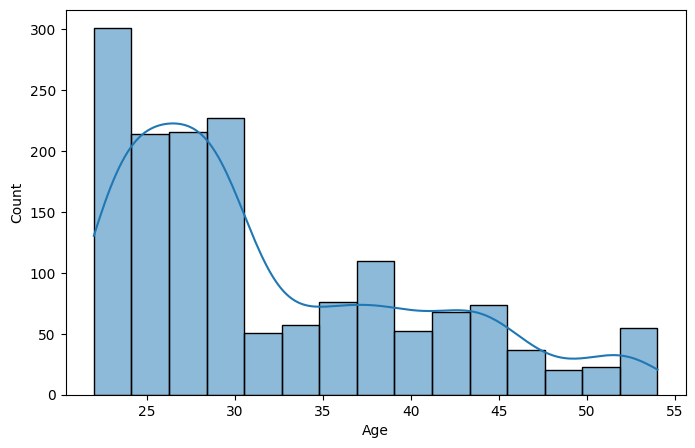

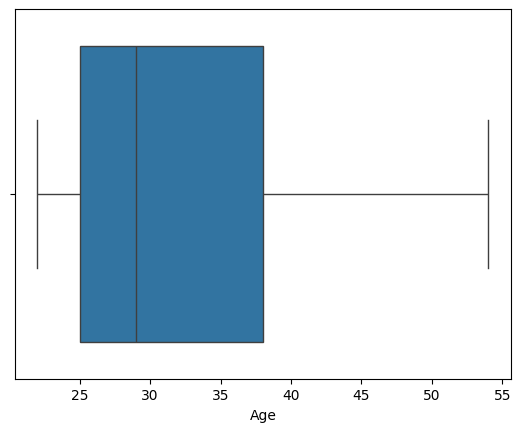

In [ ]:
# AGE
plt.figure(figsize=(8,5))                                 # Bimodal Graph
sns.histplot(data = df, x = 'Age', kde = True)           # From the kde we could say that Age is right-skewed
plt.show()
sns.boxplot(data = df, x = 'Age')
plt.show()

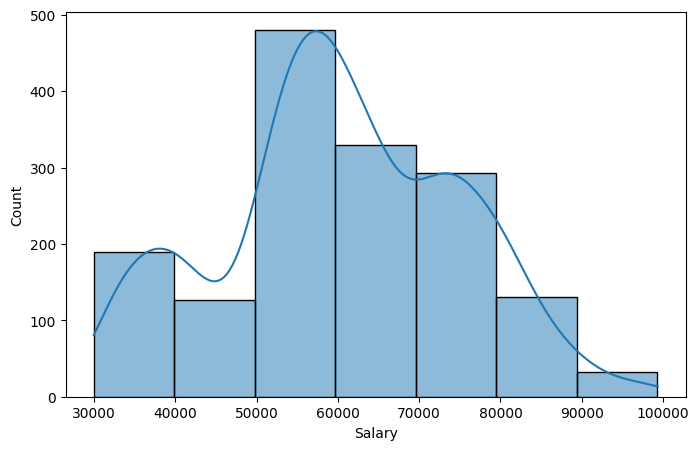

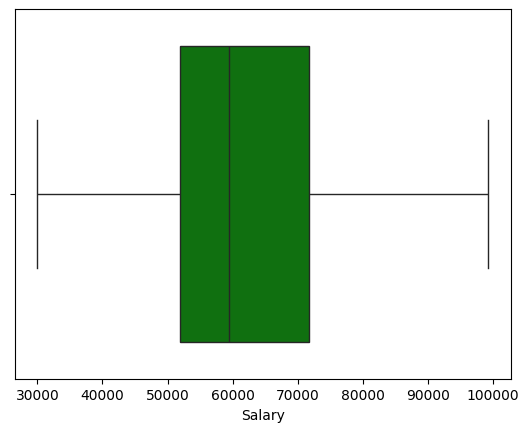

In [ ]:
# SALARY
plt.figure(figsize=(8,5))
sns.histplot(data = df, x = 'Salary', kde = True, binwidth = 10000)
plt.show()
sns.boxplot(data = df, x = 'Salary', color = 'g')
plt.show()

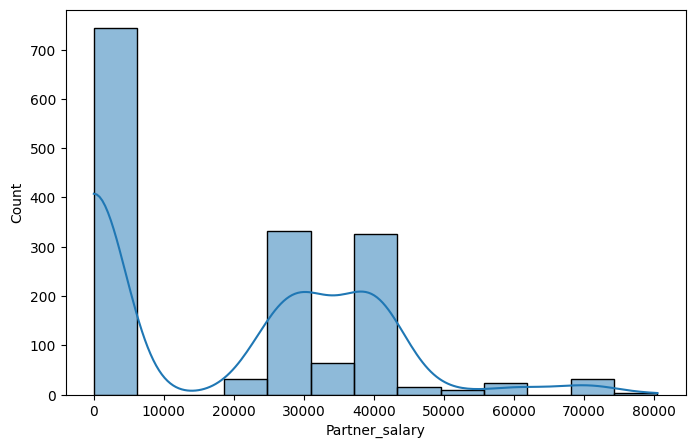

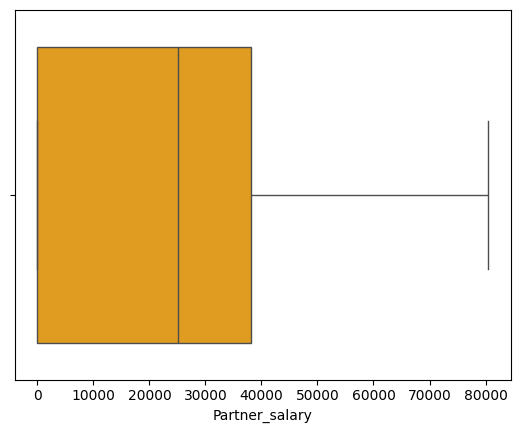

In [ ]:
# Partner_salary
plt.figure(figsize=(8,5))
sns.histplot(data = df, x = 'Partner_salary', kde = True)
plt.show()
sns.boxplot(data = df, x = 'Partner_salary', color = 'orange')
plt.show()

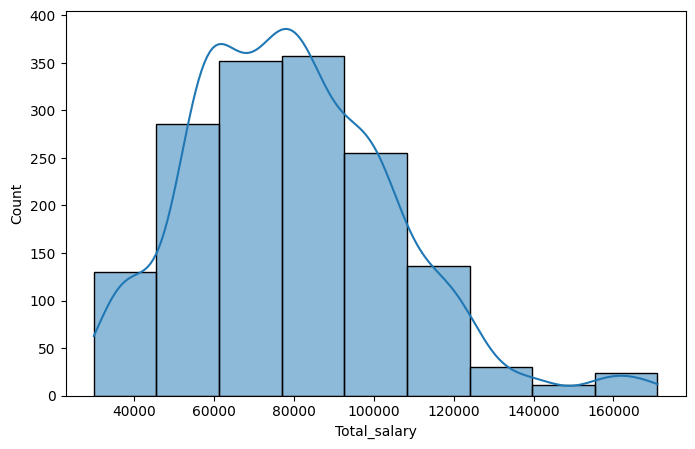

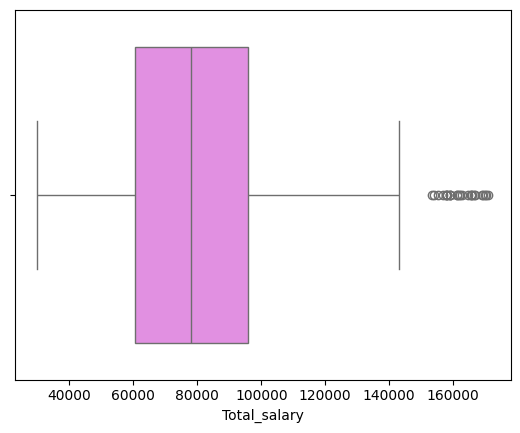

In [ ]:
# Total_salary
plt.figure(figsize=(8,5))
sns.histplot(data = df, x = 'Total_salary', kde = True, binwidth = 15000)            #Bimodal graph
plt.show()
sns.boxplot(data = df, x = 'Total_salary', color = 'violet')
plt.show()

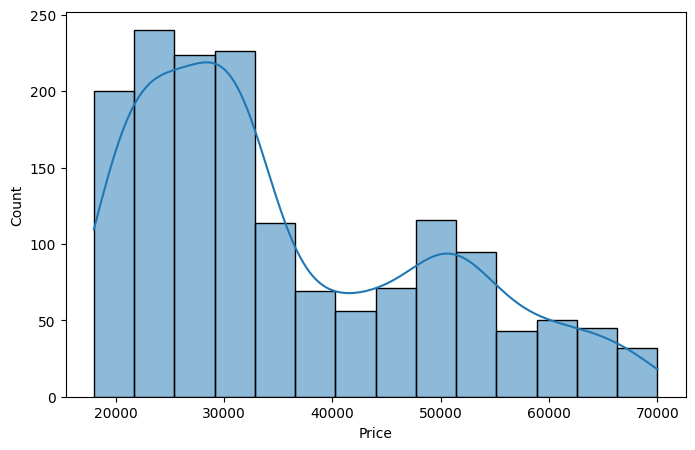

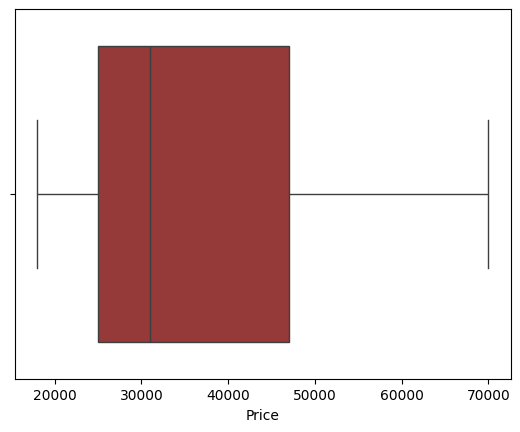

In [ ]:
# Price
plt.figure(figsize=(8,5))
sns.histplot(data = df, x = 'Price', kde = True)           #Bimodal graph and Right-skewed
plt.show()
sns.boxplot(data = df, x = 'Price', color = 'brown')
plt.show()

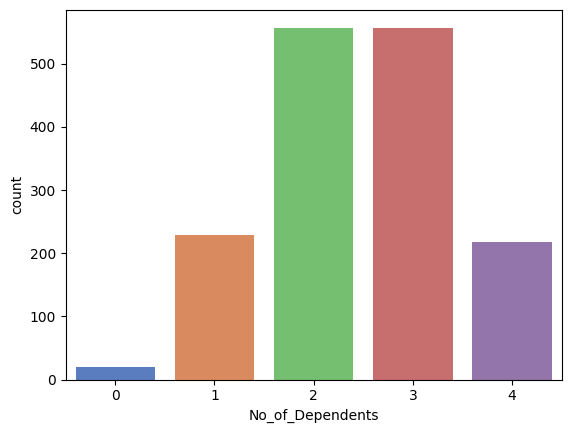

In [ ]:
# Representation of number of dependents using countplot
sns.countplot(data = df, x = 'No_of_Dependents', hue = 'No_of_Dependents', legend = False, palette="muted");
plt.show()

In [ ]:
# There are 8 categorical columns
# Gender, Profession, Marital_status, Education, Personal_loan, House_loan, Partner_working and Make

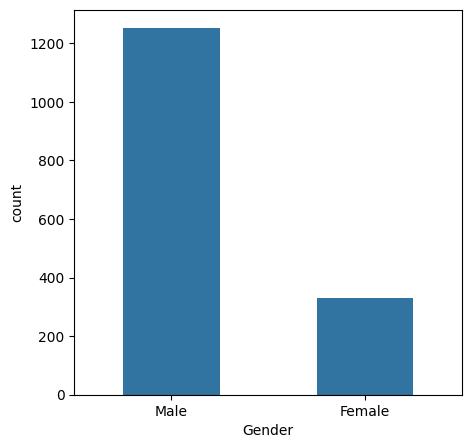

In [ ]:
# Gender
plt.figure(figsize=(5,5))
sns.countplot(data = df, x = 'Gender', width = 0.5)
plt.show()

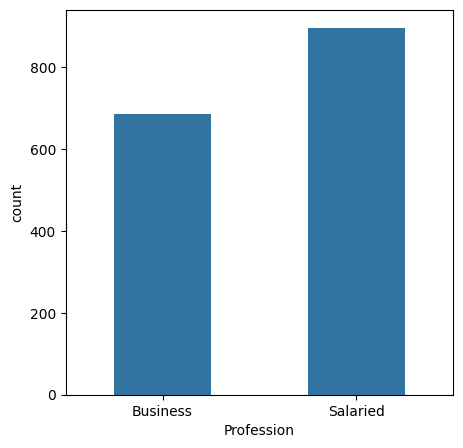

In [ ]:
# Profession
plt.figure(figsize=(5,5))
sns.countplot(data = df, x = 'Profession', width = 0.5)
plt.show()

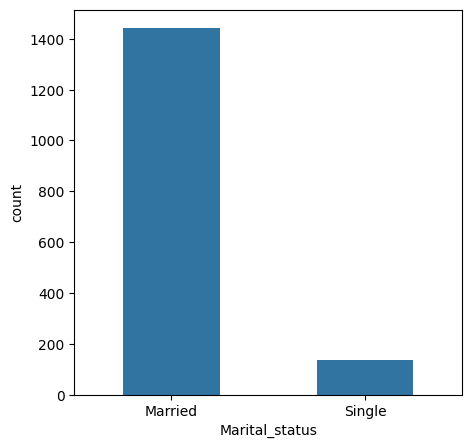

In [ ]:
# Marital_status
plt.figure(figsize=(5,5))
sns.countplot(data = df, x = 'Marital_status', width = 0.5)
plt.show()

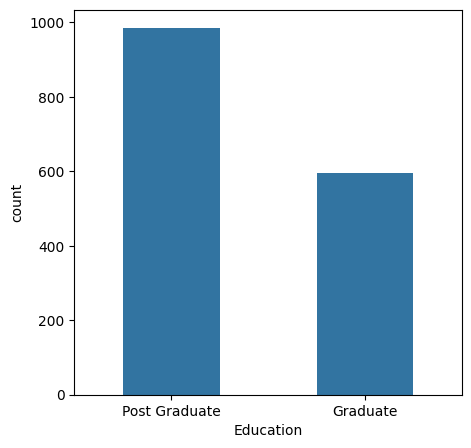

In [ ]:
# Education
plt.figure(figsize=(5,5))
sns.countplot(data = df, x = 'Education', width = 0.5)
plt.show()

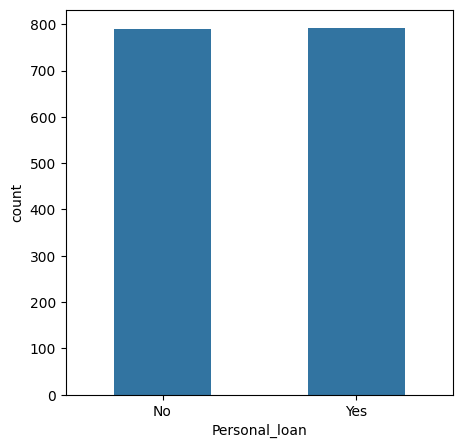

In [ ]:
# Personal_loan
plt.figure(figsize=(5,5))
sns.countplot(data = df, x = 'Personal_loan', width = 0.5)
plt.show()

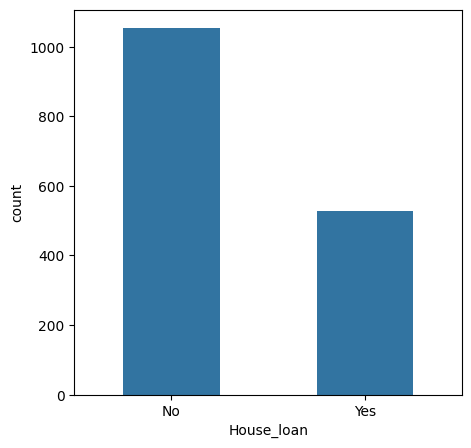

In [ ]:
# House_loan
plt.figure(figsize=(5,5))
sns.countplot(data = df, x = 'House_loan', width = 0.5)
plt.show()

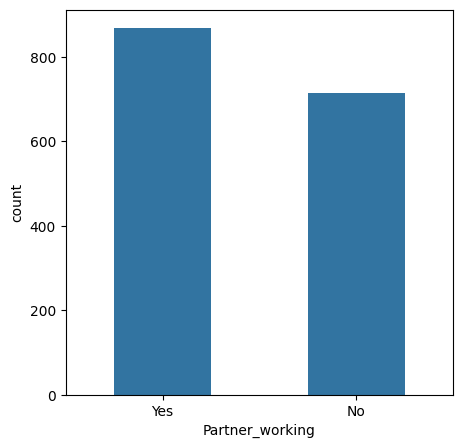

In [ ]:
# Partner_working
plt.figure(figsize=(5,5))
sns.countplot(data = df, x = 'Partner_working', width = 0.5)
plt.show()

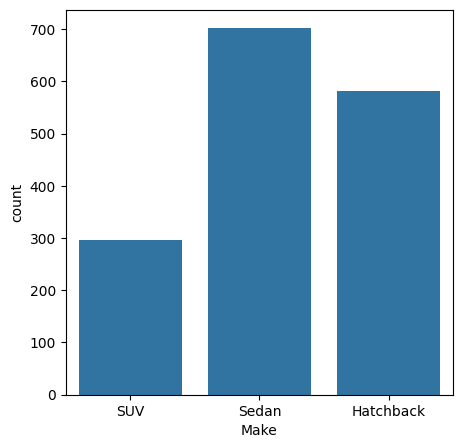

In [ ]:
# Make
plt.figure(figsize=(5,5))
sns.countplot(data = df, x = 'Make')
plt.show()

### **Observations**
- 75% of the population falls under age of 38 years.
- Salary is almost normally distributed with true min of 30,000 and true max of 99300
- Average partner salary is 60,392, IQR range is quite large. (Middle 50% of data is spread out)
- If we consider Total_salary, maximum salary is 1,71,000 and minimum is 30,000 with a normal distribution.
- There is more than 79% of male population.
- More than 56% of people are salaried and 44% of people are into business.
- Most of the people are married.
- Greater than 62% of people have a post graduate degree.
- The proportion of people taking personal loans to people not taking personal loans is almost same.
- 66% of people have taken House_loan.
- Out of 1581 cars 702 are Sedan.

### Bivariate Analysis

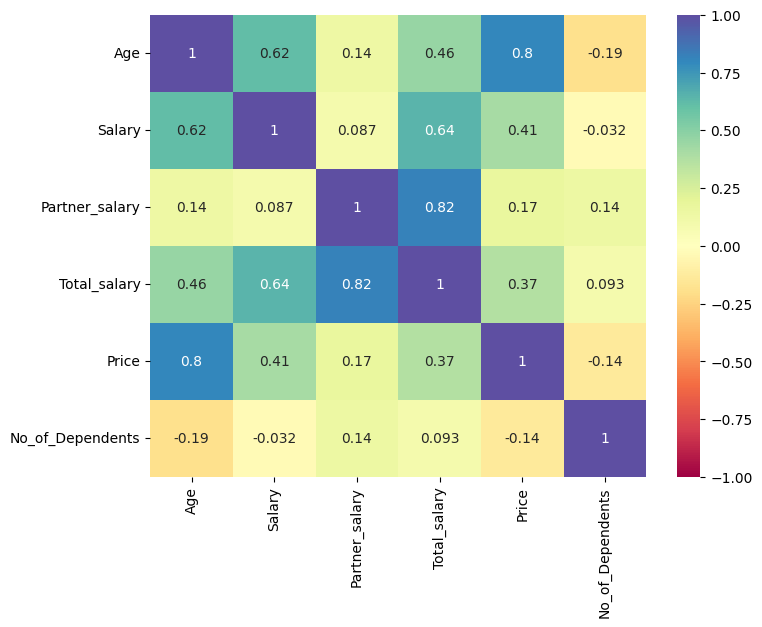

In [ ]:
# Correlation by Heatmap
num_var = ['Age', 'Salary', 'Partner_salary', 'Total_salary', 'Price', 'No_of_Dependents']
corr = df[num_var].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot = True, vmin = -1, vmax = 1, cmap = 'Spectral')
plt.show()

### **Observations**
- Salary and age are positively correlated with correlation of 0.62
- It is no wrong in saying Salary and Total_salary are correlated because Total_salary value comes from Salary. It has correlation of 0.64
- We could also see that Partner_salary and Total_salary are positively correlated with correlation of 0.82
- We could also infer that as age increases want of buying expensive/costly cars increases. It has correlation of 0.8
- No_of_dependents is negatively correlated with Salary, Age and Price with correlation of -0.032, -0.19 and -0.14 respectively.
- From initial analysis we could say that dropping the No_of_dependents columns will not cause any problem as we move forward in our analysis.  

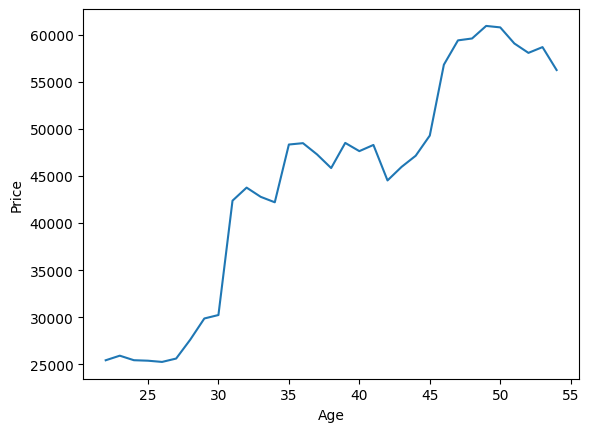

In [ ]:
# Considering Age and Price
sns.lineplot(data = df, x = 'Age', y = 'Price', errorbar = None);

**Observation**
- General trend is that as age increases people tend to buy expensive cars.

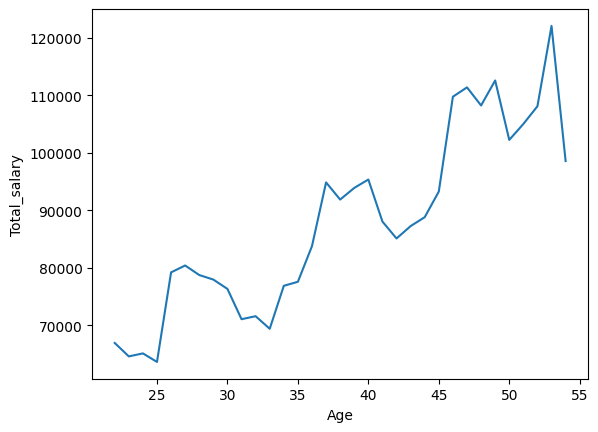

In [ ]:
# Considering Age and Total_salary
sns.lineplot(data = df, x = 'Age', y = 'Total_salary', errorbar = None);

**Observation**
- Despite few dips in the Total_salary at certain point in time, the general trend is that as age increases the Total_salary also increases.  

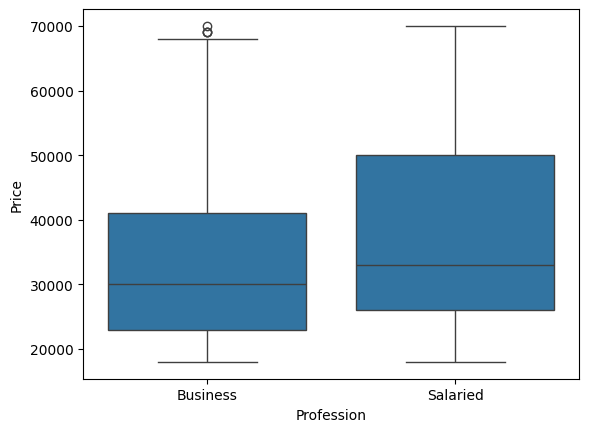

In [ ]:
# Exploring the relationship between categorical and numerical variables.
# Considering Profession and Salary
sns.boxplot(data = df, x = 'Profession', y = 'Price');

**Observations**
- The distribution of data is more in Salaried people than people who are into business.
- Both Business and Salaried are right-skewed.
- The median purchase by a Business person is 30,000
- The median purchase by a Salaried person is around 32,000
- We could see few outliers among business people buying habit but its absolutely normal for some to buy expensive cars.

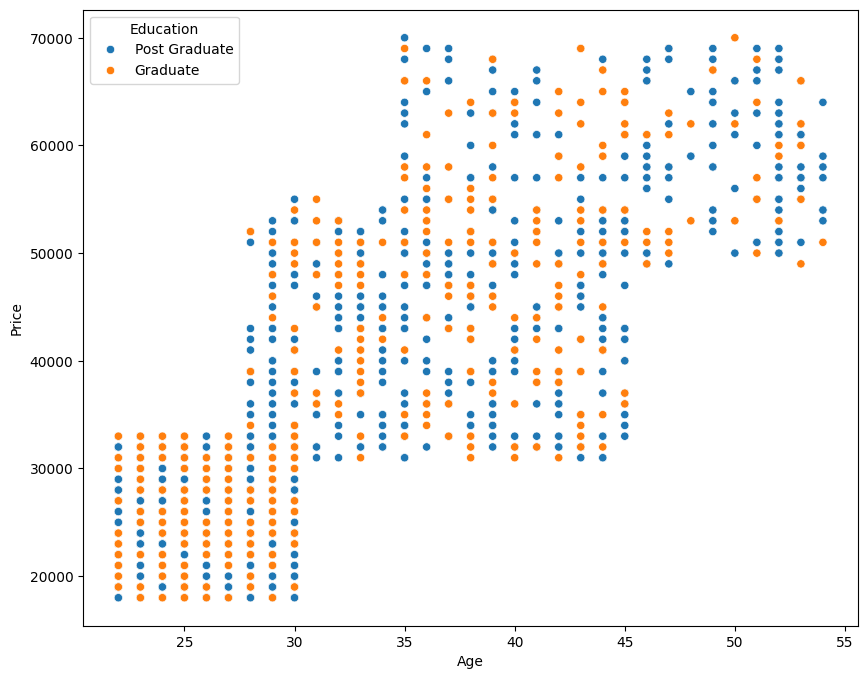

In [ ]:
# Considering Age, Price and differentiating based on Education.
plt.figure(figsize=(10,8))
sns.scatterplot(data = df, x = 'Age', y = 'Price', hue = 'Education');

**Observations**
- At young age say till 30 years we could see that graduates are more keen in buying affordable cars.
- As we move forward we could see an increasing trend of money spent on cars by both Graduates and Post Graduates.
- We could also take a note that for the ages 40 to 55 there is tendency to buy expensive cars and in which most of them are Post Graduates.
- Overall trend is that as age increases the amount of money spent on cars is increasing.

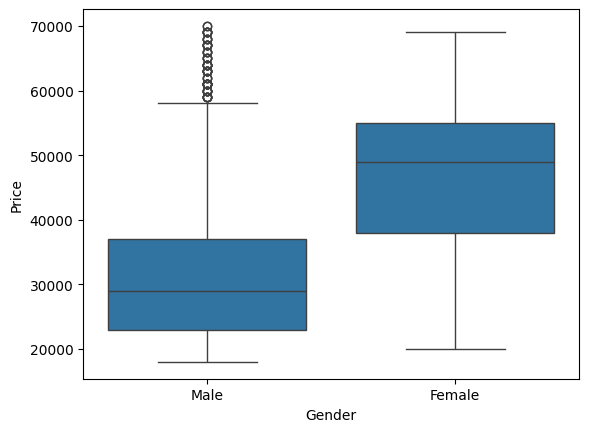

In [ ]:
# Considering Gender and Price
sns.boxplot(data = df, x = 'Gender', y = 'Price');
# Few outliers present.

**Observations**
- We could observe that money spent on cars by females is higher as there median is higher when compared with Males.
- If we consider males, there are few cases where people have spent lot of money on cars.
- If we see purchasing behaviour, female tend to have wider range of choices in terms of buying cars. Few spent less money whereas few spent more money.
- In males we could see most of them buying cars which fall under particular range of prices.

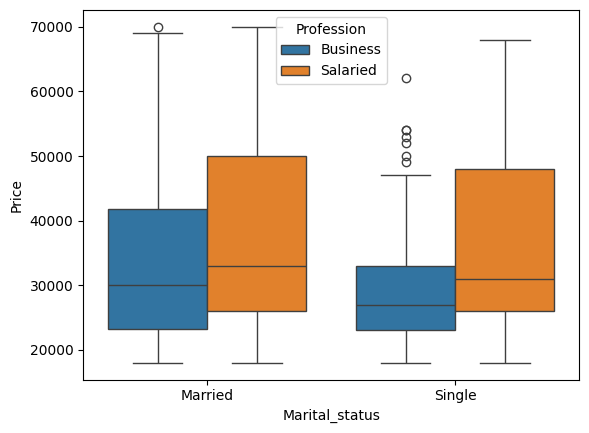

In [ ]:
# Considering Marital status and Price
sns.boxplot(data = df, x = 'Marital_status', y = 'Price', hue = 'Profession');

**Observations**
- We could see that all the boxplots are right-skewed.
- Overall we could see that married people tend to spend more on cars when compared to Single people.
- The median price spent on cars ranges from 28,000 to 33,000 for all groups of people.
- We could see that there are few Single people who are into business and have spent huge money on cars.

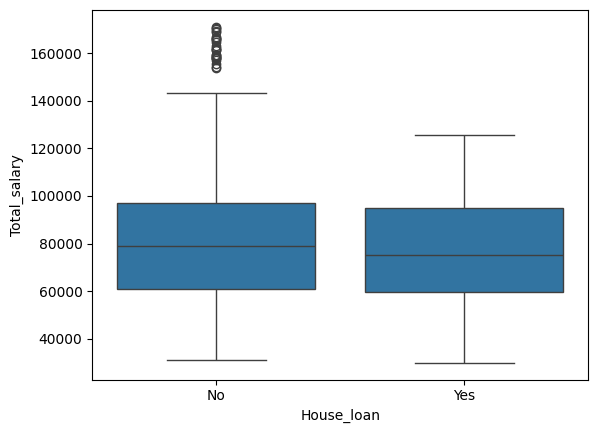

In [ ]:
sns.boxplot(data = df, x = 'House_loan', y = 'Total_salary');

**Observations**
- From both the box plots we could say that having a house loan does not drastically affect salary distribution.
- We could also say that people with high income are not much interested in taking house_loan.

### Key Questions

## 1) Do men tend to prefer SUV's more compared to women?  

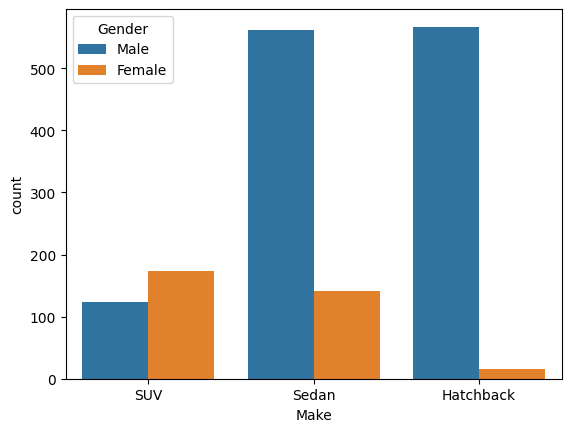

In [ ]:
sns.countplot(data = df, x = 'Make', hue = 'Gender')
plt.show()

# The answer is no because female tend to prefer SUV's more than men.

### 2) What is the likelihood of a salaried person buying a Sedan?

In [ ]:
salaried_count = df[df['Profession'] == 'Salaried'].shape[0]
sedan_salaried_count = df[(df['Profession'] == 'Salaried') & (df['Make'] == 'Sedan')].shape[0]
likelihood = sedan_salaried_count/salaried_count
print('Likelihood of salaried person buying a Sedan is:', likelihood)

Likelihood of salaried person buying a Sedan is: 0.4419642857142857


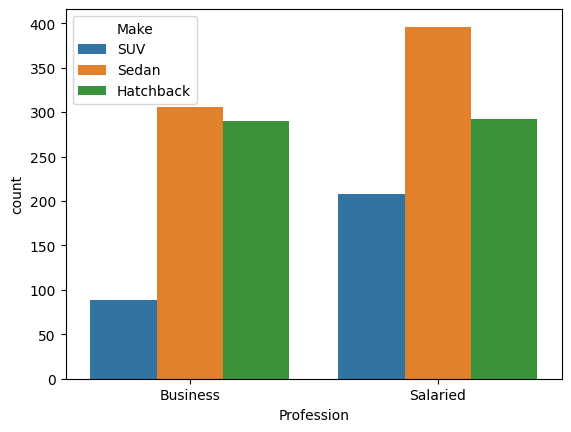

In [ ]:
sns.countplot(data = df, x = 'Profession', hue = 'Make' );

### 3) What evidence or data supports Sheldon Cooper's claim that a salaried male is an easier target for a SUV sale over a Sedan sale?


In [ ]:
salaried_male_SUV = df[(df['Gender']== 'Male') & (df['Profession'] == "Salaried") & (df['Make'] == 'SUV')]
salaried_male_Sedan = df[(df['Gender']== 'Male') & (df['Profession'] == "Salaried") & (df['Make'] == 'Sedan')]
print('Number of salaried Men who bought SUV are:', salaried_male_SUV.shape[0])
print('Number of salaried Men who bought Sedan are:',salaried_male_Sedan.shape[0])

Number of salaried Men who bought SUV are: 90
Number of salaried Men who bought Sedan are: 305


### 4) How does the amount spent on purchasing automobiles vary by gender?

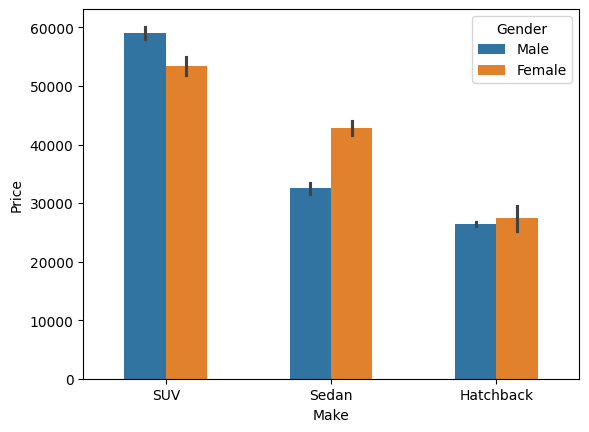

In [ ]:
sns.barplot(data = df, x = 'Make', y = 'Price', hue = 'Gender', width = 0.5);

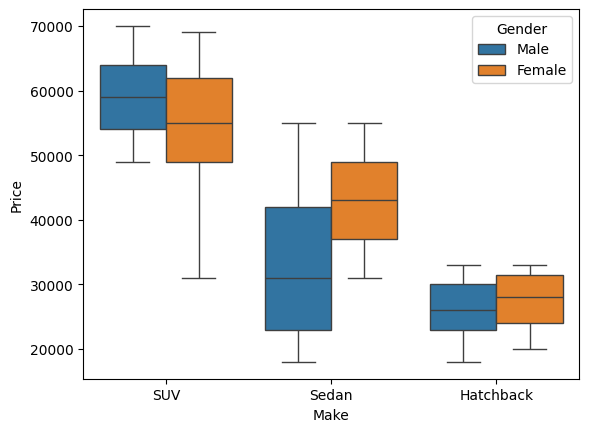

In [ ]:
sns.boxplot(data = df, x = 'Make', y = 'Price', hue = 'Gender');

**Observations**
- Overall Males spend more money on SUV's than Females.
- Overall Females spend more money on Sedans and Hatchbacks than Males.

### 5) How much money was spent on purchasing automobiles by individuals who took a personal loan?

In [ ]:
df.Personal_loan.value_counts()

,count
Personal_loan,
Yes,792
No,789


In [ ]:
people_PL = df[(df['Personal_loan'] == 'Yes')]

In [ ]:
people_PL

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
1,53,Female,Salaried,Married,Post Graduate,4,Yes,No,Yes,95500,70300.0,165800,61000,SUV
3,53,Female,Salaried,Married,Graduate,2,Yes,No,Yes,72500,70300.0,142800,61000,SUV
6,53,Female,Salaried,Married,Post Graduate,3,Yes,No,Yes,80900,50800.0,131700,51000,SUV
10,52,Male,Salaried,Married,Post Graduate,4,Yes,No,No,81600,0.0,81600,67000,SUV
12,50,Female,Salaried,Married,Graduate,3,Yes,No,No,77400,0.0,77400,62000,SUV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1572,22,Male,Business,Single,Graduate,2,Yes,No,No,36700,0.0,36700,24000,Hatchback
1573,22,Male,Business,Married,Graduate,3,Yes,No,No,36000,0.0,36000,23000,Hatchback
1574,22,Male,Salaried,Married,Graduate,3,Yes,Yes,No,34700,0.0,34700,20000,Sedan
1575,22,Male,Salaried,Married,Graduate,3,Yes,No,No,34000,0.0,34000,19000,Hatchback


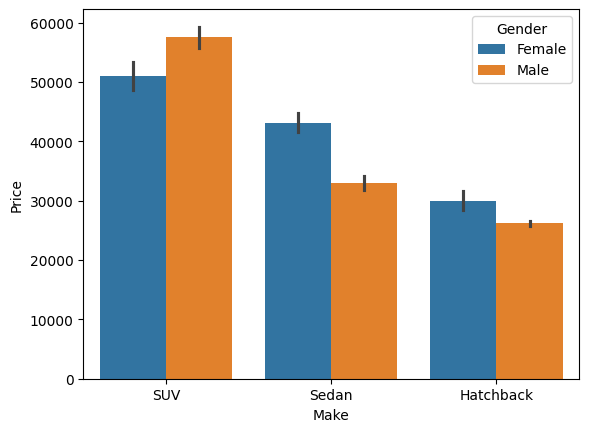

In [ ]:
sns.barplot(data = people_PL, x = 'Make', y = 'Price', hue = 'Gender');

**Observations**
- Female spent an average of 50,000 on SUV's.
- Male spent an average of 57,000 on SUV's.
- Females spent an average of 42,000 on Sedans.
- Male spent an average of 32,000 on Sedans.
- Females spent an average of 30,000 on Hatchback.
- Males spent an average of 28,000 on Hatchback.

### 6) How does having a working partner influence the purchase of higher-priced cars?

In [ ]:
df.Partner_working.value_counts()

,count
Partner_working,
Yes,868
No,713


In [ ]:
Has_wrkg_ptnr = df[(df['Partner_working'] == 'Yes')]
Has_wrkg_ptnr.shape[0]

868

In [ ]:
Has_wrkg_ptnr.Make.value_counts()

,count
Make,
Sedan,414
Hatchback,301
SUV,153


In [ ]:
Has_wrkg_ptnr.Price.mean()

35267.28110599078

In [ ]:
No_wrkg_ptnr = df[(df['Partner_working'] == 'No')]
No_wrkg_ptnr.shape[0]

713

In [ ]:
No_wrkg_ptnr.Make.value_counts()

,count
Make,
Sedan,288
Hatchback,281
SUV,144


In [ ]:
No_wrkg_ptnr.Price.mean()

36000.0

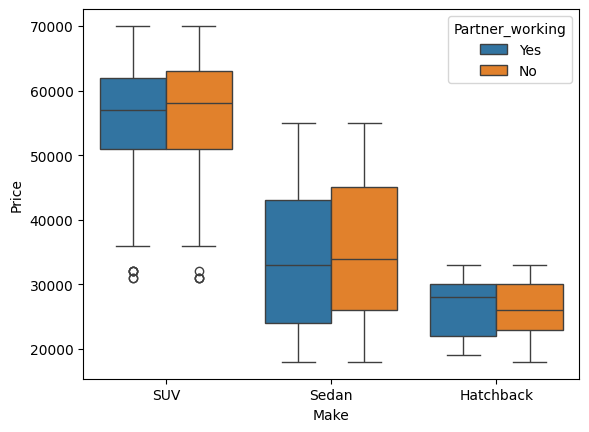

In [ ]:
sns.boxplot(data = df, x = 'Make', y = 'Price', hue = 'Partner_working');

**Observations**
- We could see that despite not having a partner there are people who have purchased SUV's.
- Sedan seems to be more afforadable and highly chosen by all the people. Sedan prices are spread out significantly.
- Hatchbacks are the cheapest.
- In general we could say that Partner_working status has not much impact on purchasing behaviour of people.  

##**Final Outcomes**
- 75% of the population falls under the age of 38 which tells that most buyers are young.
- 79% of the population is male in the dataset.
- Most buyers are married and have a post graduation degree. (i.e. 62% of people)
- Business and salaried individuals are almost same but salaried people have wider range of salaries.
- Graduates buy affordable cars whereas Postgraduates buy expensive cars.
- Median purchase price is higher for salaried people than business people.
- Males spend most money on SUV's, while females are more into buying Sedans and Hatchback.
- SUV's are the most expensive, followed by Sedans. Hatchbacks are the cheapest.
- We could say that income grows with age.
- High income people avoid taking loans.
- Married individuals spend more money on cars compared to singles.
- Average price range for most buyers is 28,000 to 33,000.
- Sedan is most chosen car type by individuals.



## **Recommendations for better marketing campaign**

**1) Digital Advertising**
- As most of the people fall under the category of youth using social media platforms like Instagram and Facebook can help in getting more calls from people.
- Customising the ads based on the segment of people present.

**2) Instant Cashbacks & other perks**
- For every new release of a car say that if you book within 30 days of the car launch you will get a cashback of 10,000 at the time of delivery of your car.
- Attracting young buyers by giving an EMI break of 6 months from the date of buying the car.
- Additional discounts on weekday purchases.

**3) Ease of loan approvals and other important things for faster and high conversion of sales**
- Partnering with top banks for easy loan approvals and processing.
- Having highly skilled sales persons for good customer interactions.
- Offering low down payment schemes for people who already have either house or personal loans.
- Offering free insurance for people buying high-priced cars.  

**4) Gender based marketing**
- For male buyers, promote the highlights of SUVs and talk more about the features.
- As female buyers are more into spending money on sedans and Hatchbacks, make them aware of the safety features and ease of driving those cars.
- For both male and female buyers try giving complimentary things like installing car covers or important car accessories which are helpful to them.

